In [2]:
import pandas as pd

data = pd.read_csv('../data/processed/processed.csv')

In [3]:
from sklearn.cluster import AgglomerativeClustering
import itertools

affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single', 'ward']
combinations = list(itertools.product(affinities, linkages[:-1]))

# Ward can only be combined with euclidean distance
combinations.append(('euclidean','ward'))


In [4]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
scores = []
predictions = []

for affinity, linkage in combinations: 
    prediction = AgglomerativeClustering(affinity=affinity, linkage=linkage).fit_predict(X=data)
    predictions.append(prediction)
    sc = silhouette_score(data, prediction)
    db = davies_bouldin_score(data, prediction)
    ch = calinski_harabasz_score(data, prediction)
    scores.append((affinity, linkage, sc, db, ch, prediction))


In [51]:
import numpy as np


X = np.array([[i for i in range(len(affinities))] for j in range(len(linkages))])
Y = np.array([[j for i in range(len(affinities))] for j in range(len(linkages))])
Z = [[0 for i in range(len(affinities))] for i in range(len(linkages))]

for i in range(len(scores)):
    affinity_id = affinities.index(scores[i][0])
    linkage_id = linkages.index(scores[i][1])
    sc = scores[i][2]
    Z[linkage_id][affinity_id] = sc
Z = np.array(Z)


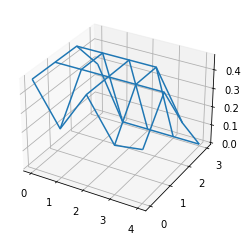

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks([i for i in range(len(affinities))])
ax.set_yticks([i for i in range(len(linkages))])

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z)
fig.show()

In [97]:
scores_2 = []

for threshold in [i/10 for i in range(1,60)]: 
    prediction = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=threshold).fit_predict(X=data)
    sc = silhouette_score(data, prediction)
    db = davies_bouldin_score(data, prediction)
    ch = calinski_harabasz_score(data, prediction)
    scores_2.append((threshold, sc, db, ch, prediction))


In [98]:
threshold, scs_2, dbs_2, chs_2, predictions_2 = zip(*scores_2)

In [99]:
scs_2

(0.006421948525910279,
 0.03069259865899841,
 0.0721979344122147,
 0.12360859661315317,
 0.13983217982509608,
 0.14532101979866477,
 0.14339481135728643,
 0.13708116874358828,
 0.15620273625335818,
 0.15333734585470304,
 0.14700652485563828,
 0.15599597844044188,
 0.1593959247885356,
 0.15086274545747463,
 0.1463814864708099,
 0.1463814864708099,
 0.16156594177236985,
 0.16175529826701457,
 0.16175529826701457,
 0.16199056383610103,
 0.15913531962512617,
 0.15913531962512617,
 0.15610373172868958,
 0.15610373172868958,
 0.18672676200668684,
 0.18672676200668684,
 0.1887171095251576,
 0.1887171095251576,
 0.1887171095251576,
 0.1887171095251576,
 0.23778732159746516,
 0.23778732159746516,
 0.23778732159746516,
 0.23778732159746516,
 0.23778732159746516,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884813,
 0.24516793208884

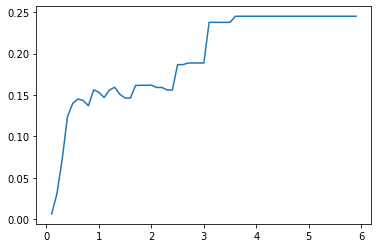

In [100]:
import matplotlib.pyplot as plt

plt.plot(threshold, scs_2)
plt.show()

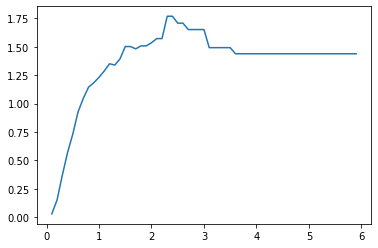

In [101]:
import matplotlib.pyplot as plt

plt.plot(threshold, dbs_2)
plt.show()

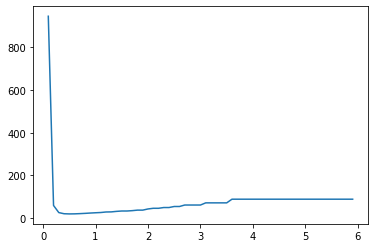

In [102]:
import matplotlib.pyplot as plt

plt.plot(threshold, chs_2)
plt.show()

In [109]:
print(scores_2[-1])

(5.9, 0.24516793208884813, 1.4382731109167004, 88.65687172960142, array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0,
       2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1], dtype=int32))
